<a href="https://colab.research.google.com/github/marcellycosta/Atividade/blob/main/Prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Soluções do sistema:
T1 = 110.83 °C
T2 = 125.42 °C
T3 = 137.92 °C
T4 = 160.83 °C


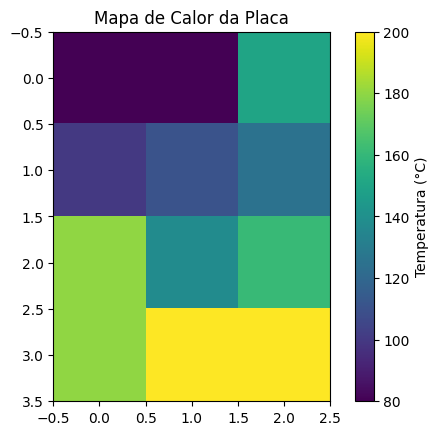

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def solve_linear_system(A, B):
    try:
        x = np.linalg.solve(A, B)
        return x
    except np.linalg.LinAlgError:
        print("O sistema linear não tem solução única.")
        return None

# Definindo os coeficientes da matriz (A) e o vetor constante (B)
A = np.array([
    [4, -1, -1, 0],
    [-1, 4, 0, -1],
    [-1, 0, 4, -1],
    [0, -1, -1, 4]
])

B = np.array([180, 230, 280, 380])

# Resolvendo o sistema linear para encontrar T 1,2,3,4
T = solve_linear_system(A, B)

# Extraindo os valores das soluções
T1, T2, T3, T4 = T
print("\nSoluções do sistema:")
print(f"T1 = {T1:.2f} °C")
print(f"T2 = {T2:.2f} °C")
print(f"T3 = {T3:.2f} °C")
print(f"T4 = {T4:.2f} °C")

# Matriz da placa com as temperaturas
plate = np.array([
    [80, 80, 150],
    [100, T1, T2],
    [180, T3, T4],
    [180, 200, 200]
])

# Mapa de calor
plt.imshow(plate, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Temperatura (°C)")
plt.title("Mapa de Calor da Placa")
plt.show()

Temperatura estimada em x = 2.5: 3.94 °C
Valor médio entre f(2) e f(3): 4.00 °C
Diferença entre o valor estimado e o valor médio: 0.06 °C


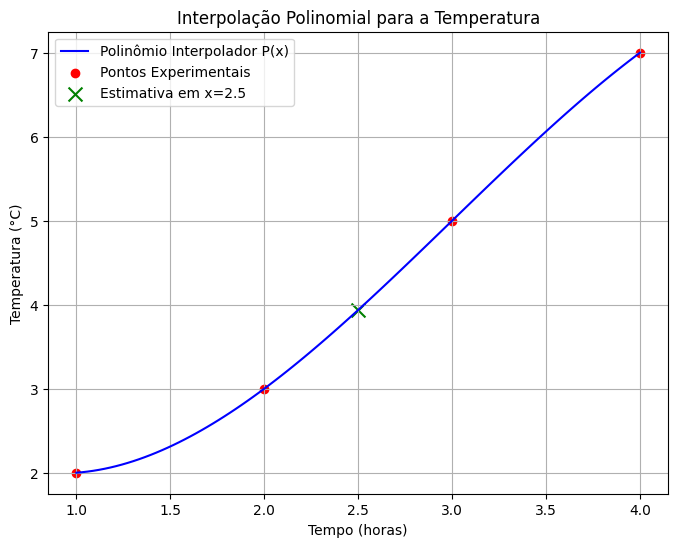

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
fx = np.array([2, 3, 5, 7])

# Sistema de equações para encontrar os coeficientes do polinômio
A = np.vander(x, increasing=True)
a = np.linalg.solve(A, fx)

# Função para o polinômio interpolador
def P(x_val):
    return np.polyval(a[::-1], x_val)

# Estimativa da temperatura
x_est = 2.5
temperatura_estimada = P(x_est)
print(f"Temperatura estimada em x = {x_est}: {temperatura_estimada:.2f} °C")

# Comparação com o valor médio
valor_medio = (fx[1] + fx[2]) / 2
print(f"Valor médio entre f(2) e f(3): {valor_medio:.2f} °C")

# Diferença entre o valor estimado e o valor médio
diferenca = abs(temperatura_estimada - valor_medio)
print(f"Diferença entre o valor estimado e o valor médio: {diferenca:.2f} °C")


x_plot = np.linspace(1, 4, 100)
y_plot = P(x_plot)

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, label="Polinômio Interpolador P(x)", color="blue")
plt.scatter(x, fx, color="red", label="Pontos Experimentais")
plt.scatter(x_est, temperatura_estimada, color="green", marker='x', s=100, label=f"Estimativa em x={x_est}")
plt.xlabel("Tempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.title("Interpolação Polinomial para a Temperatura")
plt.grid(True)
plt.show()


In [23]:
# Definindo a função f(x) para o cálculo
def f(x):
    return 3 * x**2 - 2 * x + 1

# Definindo os limites de integração, a e b
a = 1
b = 4

# Calculando o valor de f(a) e f(b)
fa = f(a)
fb = f(b)

# Calculando a integral aproximada usando a regra do trapézio
integral_trapezio = (b - a) / 2 * (fa + fb)

# Exibindo o resultado da integral aproximada em mg
print(f"O total estimado: {integral_trapezio:.2f} mg/km")


O total estimado: 64.50 mg/km


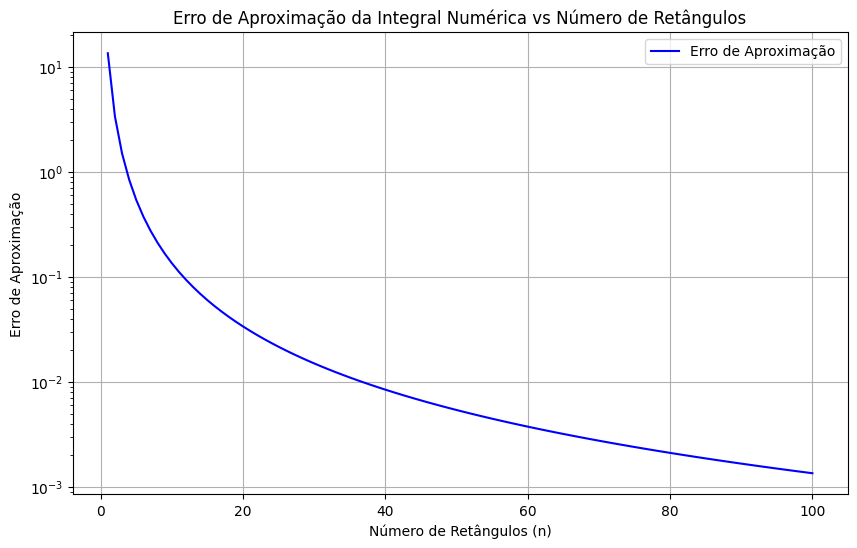

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função f(x) e sua segunda derivada f''(x)
def f(x):
    return 3 * x**2 - 2 * x + 1

def f_double_prime(x):
    return 6  # A segunda derivada de f(x) = 3x^2 - 2x + 1 é constante e igual a 6

# Definindo os limites da integração
a = 1
b = 4

# Número de retângulos (subintervalos)
n_values = np.arange(1, 101)  # Testando de 1 a 100 retângulos
errors = []

# Calculando o erro para cada n
for n in n_values:
    h = (b - a) / n
    max_f_double_prime = f_double_prime((a + b) / 2)  # Usando um ponto médio para simplicidade
    error = (b - a) * h**2 / 12 * max_f_double_prime
    errors.append(error)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors, label='Erro de Aproximação', color='blue')
plt.title('Erro de Aproximação da Integral Numérica vs Número de Retângulos')
plt.xlabel('Número de Retângulos (n)')
plt.ylabel('Erro de Aproximação')
plt.yscale('log')  # Usando escala logarítmica para melhor visualização
plt.grid()
plt.legend()
plt.show()

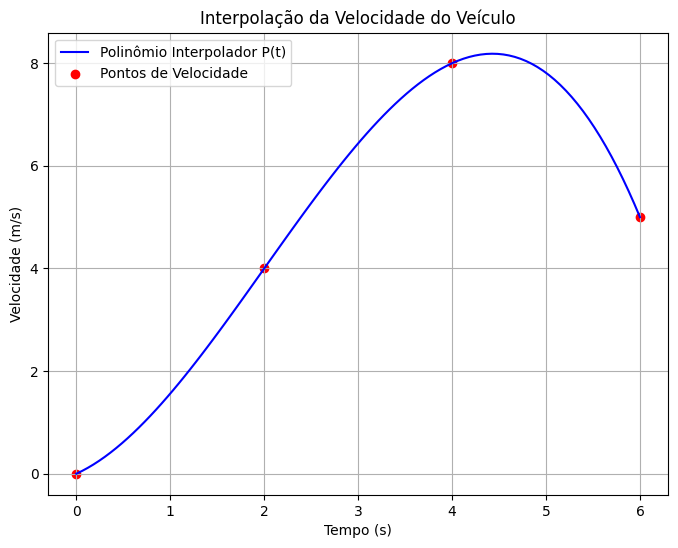

Deslocamento total estimado: 30.75 m

Considerando um deslocamento real de 26 m:
Erro absoluto: 4.75 m
Erro percentual: 18.27%


In [20]:
import numpy as np
import matplotlib.pyplot as plt
t = np.array([0, 2, 4, 6])
v = np.array([0, 4, 8, 5])


A = np.vander(t, increasing=True)
coef = np.linalg.solve(A, v)

# Definindo a função
def P(t_val):
    return np.polyval(coef[::-1], t_val)

#Grafico de P(t)
t_plot = np.linspace(0, 6, 100)
v_plot = P(t_plot)

plt.figure(figsize=(8, 6))
plt.plot(t_plot, v_plot, label="Polinômio Interpolador P(t)", color="blue")
plt.scatter(t, v, color="red", label="Pontos de Velocidade")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.legend()
plt.title("Interpolação da Velocidade do Veículo")
plt.grid(True)
plt.show()

# Integrando o polinômio P(t)
integral_P = np.polyint(coef[::-1])
deslocamento = np.polyval(integral_P, 6) - np.polyval(integral_P, 0)
print(f"Deslocamento total estimado: {deslocamento:.2f} m")

# Considerando um deslocamento de 26 m
deslocamento_real = 26
erro = abs(deslocamento - deslocamento_real)
erro_percentual = (erro / deslocamento_real) * 100

print(f"\nConsiderando um deslocamento real de {deslocamento_real} m:")
print(f"Erro absoluto: {erro:.2f} m")
print(f"Erro percentual: {erro_percentual:.2f}%")
